# 20기 KNN 정규세션 과제

**데이터:** [blackfriday | Kaggle](https://www.kaggle.com/llopesolivei/blackfriday)

---

## 0. 데이터 불러오기

In [1]:
import pandas as pd
df = pd.read_csv("blackfriday.csv", index_col = 0)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780


## 1. Preprocssing / EDA

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     4998 non-null   int64  
 1   Product_ID                  4998 non-null   object 
 2   Gender                      4998 non-null   object 
 3   Age                         4998 non-null   object 
 4   Occupation                  4998 non-null   int64  
 5   City_Category               4998 non-null   object 
 6   Stay_In_Current_City_Years  4998 non-null   object 
 7   Marital_Status              4998 non-null   int64  
 8   Product_Category_1          4998 non-null   int64  
 9   Product_Category_2          3465 non-null   float64
 10  Product_Category_3          1544 non-null   float64
 11  Purchase                    4998 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 507.6+ KB


- User_ID: 범주형 변수를 수치형으로 표시
- Product_ID: 범주형  
- Gender: 범주형  
- Age: 범주형  
- Occupation: 범주형 변수를 수치형으로 표시  
- City_Category: 범주형  
- Stay_In_Current_City_Years: 범주형  
- Marital_Status: 범주형 변수 (0/1로 표시)  
- Product_Category_1: 범주형 변수를 수치형으로 표시  
- Product_Category_2: 범주형 변수를 수치형으로 표시  
- Product_Category_3: 범주형 변수를 수치형으로 표시  
- Purchase: 수치형 변수 (구매금액. target variable)

In [13]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 2:-1]   # User_ID, Product_ID는 삭제
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Missing Values

In [14]:
X_train.isnull().sum()

Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            1153
Product_Category_3            2597
dtype: int64

- Product_Category_3은 결측치 비율이 약 70%

In [15]:
X_test.isnull().sum()

Gender                          0
Age                             0
Occupation                      0
City_Category                   0
Stay_In_Current_City_Years      0
Marital_Status                  0
Product_Category_1              0
Product_Category_2            380
Product_Category_3            857
dtype: int64

- Product_Category_2, Product_Category_3만 결측치 존재

In [16]:
X_train.drop('Product_Category_3', axis=1, inplace=True)
X_test.drop('Product_Category_3', axis=1, inplace=True)

- Product_Category_3은 결측치 비율이 높아서 제거했음

In [17]:
# 결측값 대체

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

X_train[['Product_Category_2']] = imputer.fit_transform(X_train[['Product_Category_2']])
X_test[['Product_Category_2']] = imputer.fit_transform(X_test[['Product_Category_2']])

In [18]:
X_train.isnull().sum().sum(), X_test.isnull().sum().sum()

(0, 0)

- 결측치 없음

### EDA

In [19]:
for col in X_train.columns:
    print(X_train[col].value_counts(), '\n')

M    2817
F     931
Name: Gender, dtype: int64 

26-35    1508
36-45     759
18-25     667
46-50     308
51-55     262
55+       146
0-17       98
Name: Age, dtype: int64 

4     529
0     428
7     405
1     340
17    257
12    230
20    208
14    189
16    176
2     171
6     141
3     136
15    102
10     91
5      77
11     71
19     55
13     46
18     44
9      39
8      13
Name: Occupation, dtype: int64 

B    1560
C    1175
A    1013
Name: City_Category, dtype: int64 

1     1321
3      688
2      679
4+     574
0      486
Name: Stay_In_Current_City_Years, dtype: int64 

0    2187
1    1561
Name: Marital_Status, dtype: int64 

5     1066
1      958
8      741
2      172
11     156
6      145
3      141
4       77
16      58
15      43
10      33
13      30
7       29
20      27
12      23
19      17
18      14
14      13
17       4
9        1
Name: Product_Category_1, dtype: int64 

8.0     1599
14.0     384
2.0      334
16.0     287
15.0     248
5.0      190
4.0      177
6.0  

- 데이터 상의 남성:여성의 비율이 약 3:1
- Occupation, Product_Category 변수 등은 범주 개수를 줄이는 등의 전처리가 필요해보임

In [26]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
train_df = pd.concat([X_train, y_train], axis=1)

<Axes: xlabel='Gender', ylabel='Purchase'>

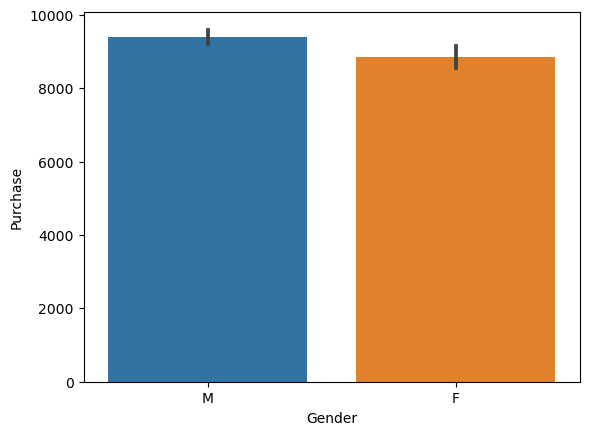

In [28]:
sns.barplot(x='Gender', y='Purchase', data=train_df)

- 남성의 구매금액이 좀 더 높음

<Axes: xlabel='Age', ylabel='Purchase'>

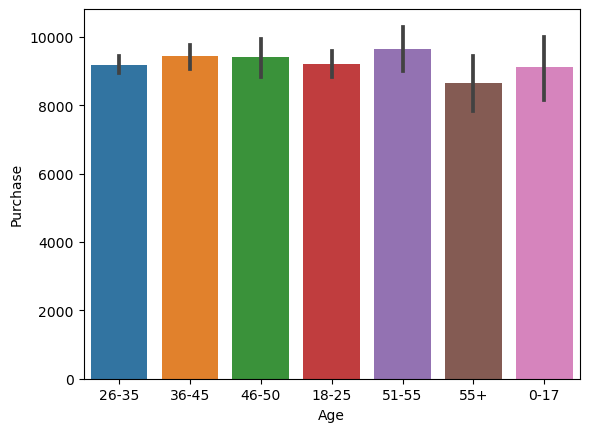

In [29]:
sns.barplot(x='Age', y='Purchase', data=train_df)

- 36-45세와 46-50세 그룹의 평균 구매금액 비슷.
- 18-25, 26-35 평균 구매금액 비슷
- 51-55세 그룹은 평균 구매금액이 다른 나이보다 좀 더 많음
- 55세 이후는 평균 구매금액이 다른 나이에 비해 약간 적음

<Axes: xlabel='Occupation', ylabel='Purchase'>

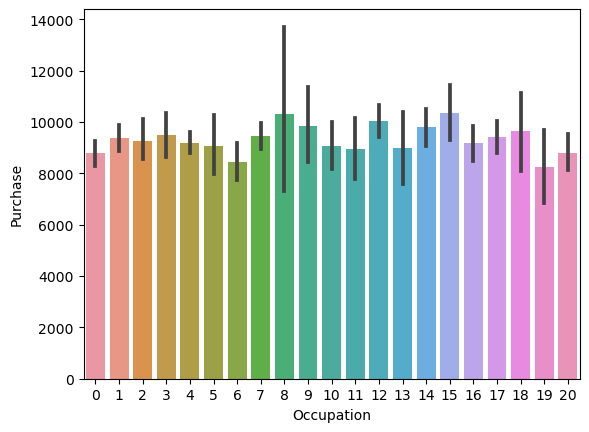

In [30]:
sns.barplot(x='Occupation', y='Purchase', data=train_df)

- Occupation이 9인 그룹은 신뢰구간이 다른 그룹보다 넓음 (데이터 수가 적어서 일관성이 잘 드러나지 않는 것일 수도)

In [237]:
train_df.groupby('Occupation')['Purchase'].mean().sort_values(ascending=False)

Occupation
15    10368.382353
8     10299.538462
12    10056.186957
9      9849.897436
14     9804.074074
18     9666.818182
3      9481.139706
7      9439.775309
17     9424.420233
1      9359.864706
2      9267.000000
4      9185.797732
16     9162.096591
5      9076.441558
10     9046.472527
13     8985.000000
11     8934.971831
20     8785.298077
0      8784.481308
6      8447.985816
19     8247.818182
Name: Purchase, dtype: float64

- 금액별로 구간 나눠서 범주를 더 줄일 수 있을 듯

<Axes: xlabel='City_Category', ylabel='Purchase'>

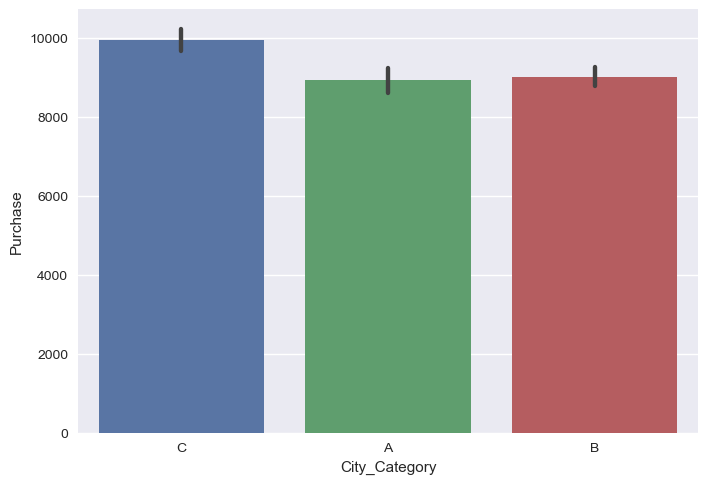

In [238]:
sns.barplot(x='City_Category', y='Purchase', data=train_df)

- C 도시의 평균 구매금액이 가장 높고 A도시와 B도시는 비슷함

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

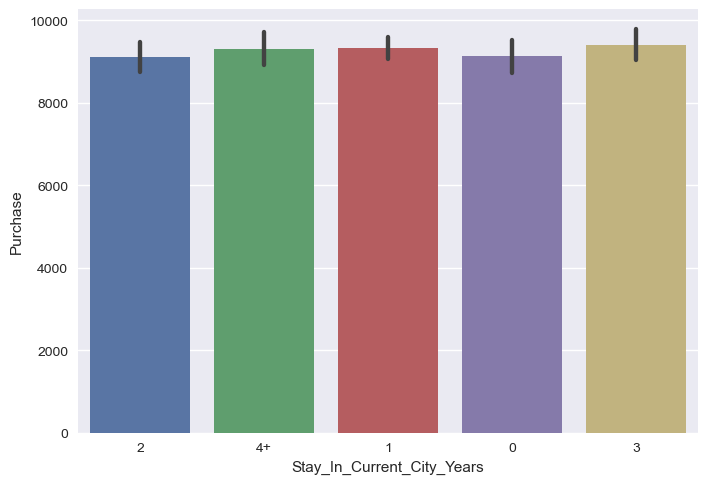

In [239]:
sns.barplot(x='Stay_In_Current_City_Years', y='Purchase', data=train_df)

- 0, 2년 거주 그룹의 구매금액 비슷
- 1, 3, 4+년 거주 그룹의 구매금액 비슷
- 그룹간에 큰 차이는 없는 것으로 보이긴 함

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

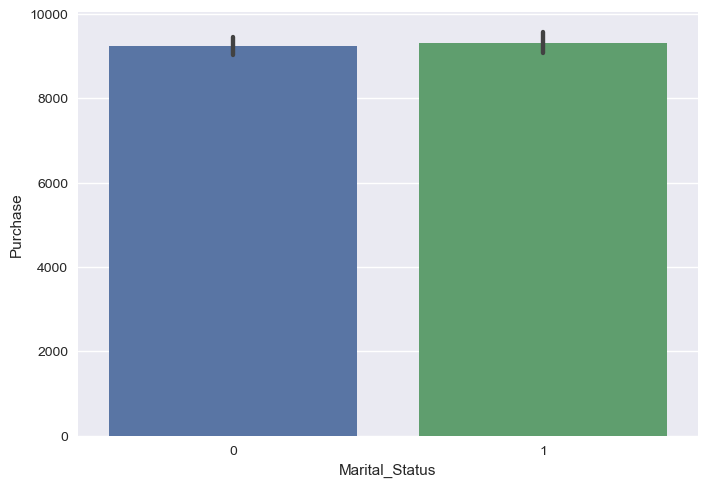

In [240]:
sns.barplot(x='Marital_Status', y='Purchase', data=train_df)

- Marital Status가 0인 그룹과 1인 그룹의 평균 구매금액이 거의 같음.

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

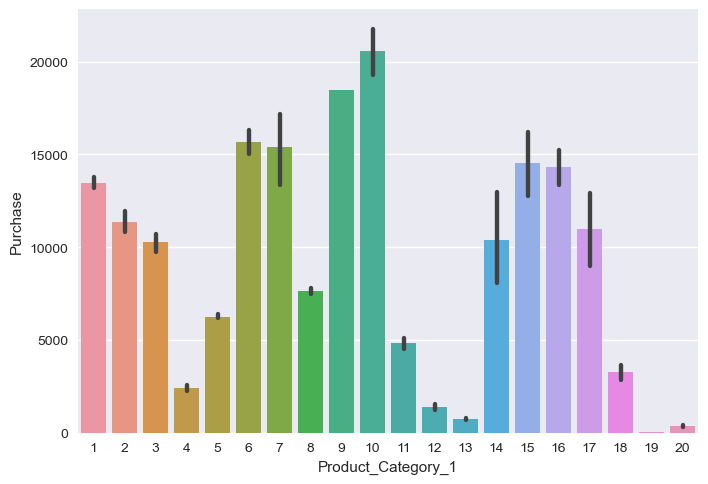

In [241]:
sns.barplot(x='Product_Category_1', y='Purchase', data=train_df)

In [242]:
train_df.groupby('Product_Category_1')['Purchase'].mean().sort_values(ascending=False)

Product_Category_1
10    20557.181818
9     18456.000000
6     15660.282759
7     15377.206897
15    14520.581395
16    14314.396552
1     13479.470772
2     11372.325581
17    10973.500000
14    10393.461538
3     10272.914894
8      7632.144399
5      6260.619137
11     4825.814103
18     3272.428571
4      2399.298701
12     1388.521739
13      733.300000
20      360.518519
19       41.058824
Name: Purchase, dtype: float64

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

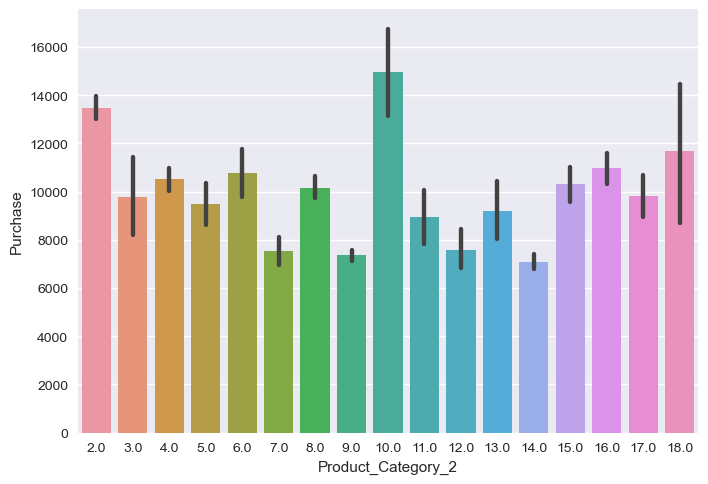

In [243]:
sns.barplot(x='Product_Category_2', y='Purchase', data=train_df)

In [244]:
train_df.groupby('Product_Category_2')['Purchase'].mean().sort_values(ascending=False)

Product_Category_2
10.0    14952.333333
2.0     13480.068862
18.0    11681.500000
16.0    10984.167247
6.0     10752.681818
4.0     10521.757062
15.0    10295.903226
8.0     10155.195067
17.0     9830.000000
3.0      9783.653846
5.0      9471.526316
13.0     9209.705128
11.0     8950.068966
12.0     7571.205882
7.0      7515.500000
9.0      7369.667500
14.0     7093.151042
Name: Purchase, dtype: float64

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

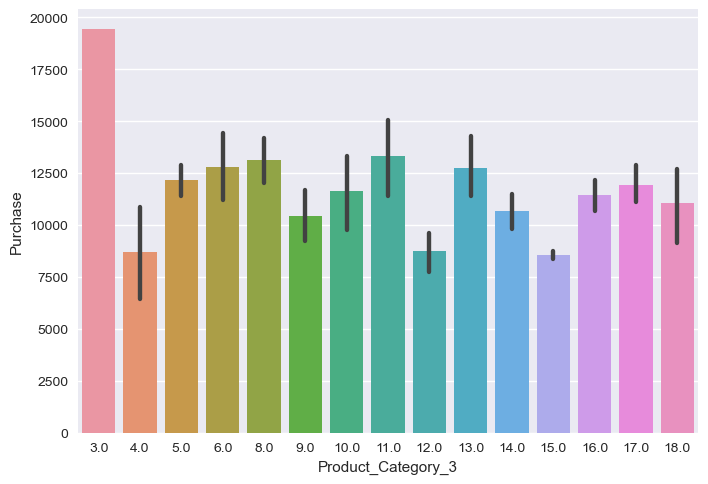

In [245]:
sns.barplot(x='Product_Category_3', y='Purchase', data=train_df)

In [246]:
train_df.groupby('Product_Category_3')['Purchase'].mean().sort_values(ascending=False)

Product_Category_3
3.0     19425.000000
11.0    13327.882353
8.0     13121.835294
6.0     12784.903226
13.0    12766.538462
5.0     12151.575758
17.0    11935.017241
10.0    11617.714286
16.0    11420.643172
18.0    11046.000000
14.0    10656.472000
9.0     10431.549296
12.0     8723.828947
4.0      8692.461538
15.0     8542.692500
Name: Purchase, dtype: float64

- Product_Category_3 범주값이 3인 상품의 평균 구매금액이 가장 높음

- 상품이 어떤 상품이냐에 따라 구매금액이 매우 상이함

### Preprocessing

#### Age 변수 범주 merge

In [31]:
X_train['Age'] = X_train['Age'].replace(['36-45', '46-50'], '36-50')
X_train['Age'] = X_train['Age'].replace(['18-25', '26-35'], '18-35')

X_test['Age'] = X_test['Age'].replace(['36-45', '46-50'], '36-50')
X_test['Age'] = X_test['Age'].replace(['18-25', '26-35'], '18-35')

In [32]:
X_train['Age'].unique(), X_test['Age'].unique()

(array(['18-35', '36-50', '51-55', '55+', '0-17'], dtype=object),
 array(['0-17', '18-35', '55+', '51-55', '36-50'], dtype=object))

#### Occupation 범주 merge

In [33]:
def occupation(value):
    if value in [15, 8, 12]:
        return 1
    elif value in [9, 14, 18]:
        return 2
    elif value in [3, 7, 17, 1, 2, 4, 16, 5, 10]:
        return 3
    else:
        return 4

X_train['Occupation'] = X_train['Occupation'].apply(lambda x: occupation(x))
X_test['Occupation'] = X_test['Occupation'].apply(lambda x: occupation(x))

In [34]:
X_train['Occupation'].unique(), X_test['Occupation'].unique()

(array([3, 4, 2, 1], dtype=int64), array([3, 4, 1, 2], dtype=int64))

#### City_Category 범주 merge

In [35]:
X_train['City_Category'] = X_train['City_Category'].replace(['A', 'B'], 'AorB')
X_test['City_Category'] = X_test['City_Category'].replace(['A', 'B'], 'AorB')

In [36]:
X_train['City_Category'].unique(), X_test['City_Category'].unique()

(array(['C', 'AorB'], dtype=object), array(['AorB', 'C'], dtype=object))

#### Stay_In_Current_City_Years 범주 merge

In [37]:
X_train['Stay_In_Current_City_Years'] = X_train['Stay_In_Current_City_Years'].replace(['0', '2'], '0or2')
X_train['Stay_In_Current_City_Years'] = X_train['Stay_In_Current_City_Years'].replace(['1', '3', '4+'], 'others')

X_test['Stay_In_Current_City_Years'] = X_test['Stay_In_Current_City_Years'].replace(['0', '2'], '0or2')
X_test['Stay_In_Current_City_Years'] = X_test['Stay_In_Current_City_Years'].replace(['1', '3', '4+'], 'others')

In [38]:
X_train['Stay_In_Current_City_Years'].unique(), X_test['Stay_In_Current_City_Years'].unique()

(array(['0or2', 'others'], dtype=object),
 array(['0or2', 'others'], dtype=object))

#### Product_Category 범주 merge

In [39]:
def product_cat1(value):
    if value in [10, 9]:
        return 1
    elif value in [6, 7, 15, 16, 1]:
        return 2
    elif value in [2, 17, 14, 3]:
        return 3
    elif value in [8, 5, 11]:
        return 4
    elif value in [18, 4, 12]:
        return 5
    else:
        return 6

X_train['Product_Category_1'] = X_train['Product_Category_1'].apply(lambda x: product_cat1(x))
X_test['Product_Category_1'] = X_test['Product_Category_1'].apply(lambda x: product_cat1(x))

In [40]:
X_train['Product_Category_1'].unique(), X_test['Product_Category_1'].unique()

(array([6, 4, 3, 2, 1, 5], dtype=int64),
 array([3, 4, 2, 5, 6, 1], dtype=int64))

In [41]:
def product_cat2(value):
    if value == 10.0:
        return 1
    elif value == 2.0:
        return 2
    elif value in [18.0, 16.0,  6.0,  4.0, 15.0,  8.0]:
        return 3
    elif value in [17.0,  3.0,  5.0, 13.0, 11.0]:
        return 4
    elif value in [12.0,  7.0,  9.0, 14.0]:
        return 5

X_train['Product_Category_2'] = X_train['Product_Category_2'].apply(lambda x: product_cat2(x))
X_test['Product_Category_2'] = X_test['Product_Category_2'].apply(lambda x: product_cat2(x))

In [42]:
X_train['Product_Category_2'].unique(), X_test['Product_Category_2'].unique()

(array([3, 4, 2, 5, 1], dtype=int64), array([3, 5, 2, 4, 1], dtype=int64))

#### One-hot encoding

In [43]:
non_object = X_train.select_dtypes(exclude=['object']).columns
X_train[non_object] = X_train[non_object].astype('object')

X_test[non_object] = X_test[non_object].astype('object')

In [44]:
import warnings
warnings.filterwarnings('ignore')

X_train = pd.get_dummies(X_train)
X_train

,Gender_F,Gender_M,Age_0-17,Age_18-35,Age_36-50,Age_51-55,Age_55+,Occupation_1,Occupation_2,Occupation_3,...,Product_Category_1_2,Product_Category_1_3,Product_Category_1_4,Product_Category_1_5,Product_Category_1_6,Product_Category_2_1,Product_Category_2_2,Product_Category_2_3,Product_Category_2_4,Product_Category_2_5
2780,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
3980,0,1,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1870,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4126,1,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
1616,0,1,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
466,0,1,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
3092,1,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
3772,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [45]:
X_test = pd.get_dummies(X_test)

In [46]:
X_test

,Gender_F,Gender_M,Age_0-17,Age_18-35,Age_36-50,Age_51-55,Age_55+,Occupation_1,Occupation_2,Occupation_3,...,Product_Category_1_2,Product_Category_1_3,Product_Category_1_4,Product_Category_1_5,Product_Category_1_6,Product_Category_2_1,Product_Category_2_2,Product_Category_2_3,Product_Category_2_4,Product_Category_2_5
84,0,1,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2470,0,1,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
2803,0,1,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4986,0,1,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4923,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4882,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2847,0,1,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
490,0,1,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0


### Feature Selection

In [50]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

select = SelectKBest(mutual_info_regression, k=15)
select.fit(X_train, y_train)

SelectKBest(k=15,
            score_func=<function mutual_info_regression at 0x000002E02AF0F7E0>)

In [51]:
selected = X_train.columns[select.get_support()]
selected

Index(['Occupation_2', 'Stay_In_Current_City_Years_0or2',
       'Stay_In_Current_City_Years_others', 'Marital_Status_0',
       'Marital_Status_1', 'Product_Category_1_1', 'Product_Category_1_2',
       'Product_Category_1_3', 'Product_Category_1_4', 'Product_Category_1_5',
       'Product_Category_1_6', 'Product_Category_2_2', 'Product_Category_2_3',
       'Product_Category_2_4', 'Product_Category_2_5'],
      dtype='object')

In [52]:
final_train = X_train[selected]
X_test = X_test[selected]

## 2. KNN 구현 & 파라미터 튜닝

### 하이퍼파라미터 튜닝 전

In [53]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

In [54]:
knn.fit(final_train, y_train)

KNeighborsRegressor()

In [55]:
from sklearn.metrics import mean_squared_error, r2_score
import math

y_pred = knn.predict(X_test)
print(math.sqrt(mean_squared_error(y_test, y_pred)))
print(r2_score(y_test, y_pred))

3536.047303733365
0.4957537024201556


### 하이퍼파라미터 튜닝

In [56]:
# from sklearn.neighbors import DistanceMetric
# import numpy as np

# DistanceMetric.get_metric('mahalanobis', V=np.cov(X_train))

In [57]:
from sklearn.model_selection import KFold, GridSearchCV

params = {'n_neighbors':[x for x in range(3, 51) if x % 2 != 0],
          'p': [1,2],
         'weights':['uniform', 'distance']}

kfold = KFold(n_splits=5, shuffle = True, random_state=0)

knn = KNeighborsRegressor()
grid_cv = GridSearchCV(knn, param_grid = params, cv = kfold, n_jobs = -1)
grid_cv.fit(final_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'n_neighbors': 49, 'p': 1, 'weights': 'distance'}
최고 예측 정확도: 0.5648


In [58]:
best = grid_cv.best_estimator_

## 3. Evaluation

In [59]:
y_pred = best.predict(X_test)

In [60]:
print(math.sqrt(mean_squared_error(y_test, y_pred)))
print(r2_score(y_test, y_pred))

3265.84740082432
0.5698713589081885


RMSE는 3265, R2 계수는 0.57